In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set()
pd.set_option('max.columns', 275, 'max.rows', 275)
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard


In [9]:
y = pd.read_csv('data/processed/3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
y = y['Satisfaction_Score']

FileNotFoundError: [Errno 2] File b'data/processed/3.0 Processed Data with Dummy Variables.csv' does not exist: b'data/processed/3.0 Processed Data with Dummy Variables.csv'

In [10]:
x = pd.read_csv('data/processed/3.1 Scaled Independent Variables.csv', index_col = 'Unnamed: 0')
x.head()

FileNotFoundError: [Errno 2] File b'data/processed/3.1 Scaled Independent Variables.csv' does not exist: b'data/processed/3.1 Scaled Independent Variables.csv'

### PCA Exploration ###
I wanted to see how reducing the dataset's number of dimensions might provide insights on the optimal number of features, components, or variables to model the data.

In [ ]:
from sklearn.decomposition import PCA
cum_var=[]
step_var = []
for i in range(1,25):
    pca = PCA(n_components=i)
    pca.fit_transform(x)
    step_var.append(pca.explained_variance_ratio_[-1])
    cum_var.append(sum(pca.explained_variance_ratio_))
    print(i,pca.explained_variance_ratio_[-1])

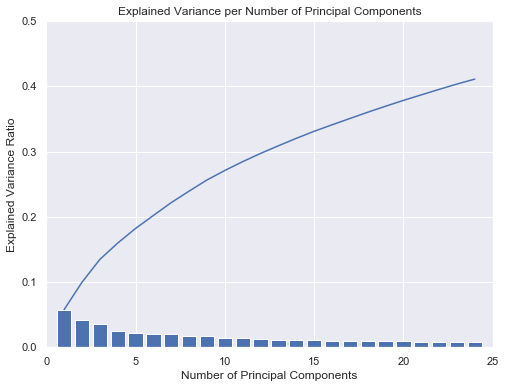

In [13]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.bar(range(1,25), step_var, align='center')
plt.plot(range(1,25), cum_var)
plt.axis([0,25,0,0.5])
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title ('Explained Variance per Number of Principal Components')
f1 = plt.gcf()
plt.show()

In [14]:
%cd ..\..\models
f1.savefig('Explained Variance per Number of Principal Components.png')

[WinError 2] The system cannot find the file specified: '..\\..\\models'
C:\Users\SiddharthaMisra\Documents\Springboard


In [15]:
pca = PCA(n_components=10)
fit = pca.fit(x)
print(sum(pca.explained_variance_ratio_))
pca_df = pd.DataFrame(pca.components_, columns = list(x.columns))
pca_df

0.2709808401888172


,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet,Housing_5,Housing_6,Housing_Apartment/ Townhouse/ Condominium,Housing_Mobile house,Housi

In [16]:
coefs = pca_df.sum(axis=0)
coefs.sort_values(ascending=False)

Religious_Attendance_0                        4.897260e-01
Marital_Status_Single                         4.509255e-01
Religion_None                                 4.486255e-01
US_Born                                       3.136127e-01
Student                                       3.032115e-01
Ethnicity_Vietnamese                          2.607068e-01
Quality_of_Service                            2.606466e-01
Friends                                       2.501177e-01
Ethnicity_Chinese                             2.488802e-01
Present_Oral_Health                           2.361957e-01
Present_Health                                2.157682e-01
Austin_Quality_of_Life                        1.925927e-01
Arts_and_Culture                              1.911041e-01
Religion_Buddhist                             1.878026e-01
Small_Businesses                              1.842302e-01
Public_Transportation                         1.806432e-01
Language_Chinese Simplified                   1.726319e-

In [21]:
sub_factors = pca_df[['Age','Duration_of_Residency','Household_Size', 'Education_Completed','English_Speaking','English_Difficulties']]
sub_factors

,Age,Duration_of_Residency,Household_Size,Education_Completed,English_Speaking,English_Difficulties
0,0.015160,-0.051344,-0.017311,-0.071113,-0.122400,0.018950
1,-0.232641,-0.156628,-0.076380,0.076058,0.110308,0.016761
2,-0.106997,0.110364,-0.023900,0.039486,0.164734,-0.059733
3,-0.001267,-0.046788,0.020830,-0.118278,-0.039093,0.016559
4,0.029578,-0.035757,-0.006416,0.034755,0.059725,0.068417
5,0.010158,0.032060,-0.050821,0.097026,-0.028459,0.015857
6,-0.017136,-0.020105,-0.008275,0.010509,0.001030,0.020051
7,0.029525,0.143938,0.061448,-0.108255,0.088439,-0.080462
8,-0.094818,-0.058151,0.050456,-0.077110,-0.098002,0.002254
9,0.041009,0.115573,-0.097959,0.022181,0.025930,-0.052451


In [23]:
pca_coefs = sub_factors.sum(axis=1)
pca_coefs['sum'] = pca_coefs.sum()
pca_coefs

0     -0.228058
1     -0.262520
2      0.123954
3     -0.168037
4      0.150303
5      0.075820
6     -0.013926
7      0.134634
8     -0.275371
9      0.054282
sum   -0.408920
dtype: float64

In [25]:
%cd AAQL_Analysis/models/
sub_factors.to_csv('Coefficients of Key Variables with 10 Principal Components.csv')

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models
